# 1. Definitions & basic recap
- Network = Graph = (nodes, edges)
- Directed or Undirected
- Facebook : Undirected
- Twitter : Directed (Follower)

- networkx : API for analysis of graphs


In [1]:
import networkx as nx

In [3]:
G = nx.Graph()

In [6]:
G.add_nodes_from(['customer1','customer2','customer3'])

In [8]:
G.add_edges_from([['customer1', 'customer2'], ['customer1', 'customer3']])

In [9]:
len(G.nodes())

3

In [10]:
len(G.edges())

2

In [11]:
type(G)

networkx.classes.graph.Graph

In [12]:
import nxviz as nv
import matplotlib.pyplot as plt

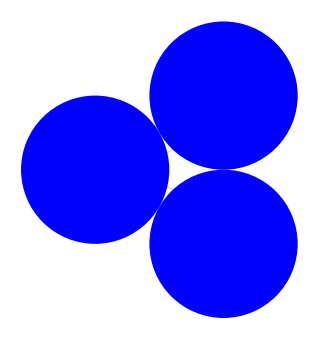

In [13]:
c = nv.CircosPlot(G)
c.draw()
plt.show()

## 1-1. Bipartite graphs
- A graph that is partitioned into two sets
- Nodes are only connected to nodes in other partitions
- Contrast : "unipartite"
<img src = "./img/Bipartite_Graph.jpg">

In [15]:
G = nx.Graph()
numbers = range(3)
G.add_nodes_from(numbers, bipartite='customers')
letters = ['a','b']
G.add_nodes_from(letters, bipartite='products')

In [19]:
G.nodes(data = True)

NodeDataView({0: {'bipartite': 'customers'}, 1: {'bipartite': 'customers'}, 2: {'bipartite': 'customers'}, 'a': {'bipartite': 'products'}, 'b': {'bipartite': 'products'}})

### Degree centrality
- Definition: umber of neighbors / number of possible neighbors

## 1-2. Filtering Graphs

<img src = "./img/Bipartite_Graph_2.jpg">

In [23]:
G.add_edges_from([[0,'b'], [1,'b'],[2,'a'],[2,'b']])

In [24]:
cust_nodes = [n for n, d in G.nodes(data = True) if d['bipartite'] == 'customers']

In [25]:
cust_nodes

[0, 1, 2]

In [26]:
nx.bipartite.degree_centrality(G, cust_nodes)

{0: 0.5, 1: 0.5, 2: 1.0, 'a': 0.3333333333333333, 'b': 1.0}

In [27]:
dcs = nx.bipartite.degree_centrality(G,cust_nodes)

In [34]:
dcs[]

{0: 0.5, 1: 0.5, 2: 1.0, 'a': 0.3333333333333333, 'b': 1.0}

In [31]:
user_dcs = [dcs[] for n in dcs]

In [33]:
user_dcs

[0.5, 0.5, 1.0, 0.3333333333333333, 1.0]

In [37]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'customers')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G,'products')))

3
2


In [38]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G,'customers')

In [49]:
user_nodes

[0, 1, 2]

In [40]:
# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

In [41]:
dcs

{0: 0.25, 1: 0.25, 2: 0.5, 'a': 0.25, 'b': 0.75}

In [47]:
# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

In [48]:
user_dcs

[0.25, 0.25, 0.5]

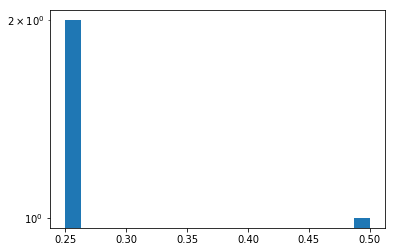

In [52]:
# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()


## 1-3. Recommendation systems
<img src = "./img/Recommend_system.jpg">

In [72]:
G = nx.Graph()
users = ['user1','user2','user3']
G.add_nodes_from(users, bipartite = 'users')
repository = ['repo1','repo2','repo3']
G.add_nodes_from(repository, bipartite = 'repositories')

In [73]:
G.add_edges_from([['user1', 'repo2'], ['user2','repo2'], 
                  ['user3', 'repo1'], ['user3', 'repo2']])

In [74]:
G.nodes(data = True)

NodeDataView({'user1': {'bipartite': 'users'}, 'user2': {'bipartite': 'users'}, 'user3': {'bipartite': 'users'}, 'repo1': {'bipartite': 'repositories'}, 'repo2': {'bipartite': 'repositories'}, 'repo3': {'bipartite': 'repositories'}})

In [75]:
G.edges()

EdgeView([('user1', 'repo2'), ('user2', 'repo2'), ('user3', 'repo1'), ('user3', 'repo2')])

In [80]:
user1_nbrs = list(G.neighbors('user1'))
user1_nbrs

['repo2']

In [81]:
user3_nbrs = list(G.neighbors('user3'))
user3_nbrs

['repo1', 'repo2']

In [82]:
set(user1_nbrs).intersection(user3_nbrs)  # intersection() : 교집합

{'repo2'}

In [84]:
set(user3_nbrs).difference(user1_nbrs)  # difference() : 차집합

{'repo1'}

In [95]:
user_nodes = set(users)

In [106]:
from collections import defaultdict
similarities = defaultdict(list)

In [107]:
similarities[0].append(3)

In [108]:
similarities[0].append(5)
similarities[0].append(1)
similarities

defaultdict(list, {0: [3, 5, 1]})

In [114]:
max(similarities[0])

5

# 2. Concept of projection
- Useful to investigate the relationships between nodes on one partition
- Conditioned on the connections to the nodes in the other partition

### Example)
<img src ='./img/Projection.jpg'>

## 　　　　　↓↓↓↓↓↓↓↓↓↓  Projection  ↓↓↓↓↓↓↓↓↓↓
<img src ='./img/Projection_2.jpg'>

## Reading network data

In [133]:
import networkx as nx
G = nx.read_edgelist('american-revolution.txt')

In [134]:
list(G.edges(data = True))[0:5]

[('Barrett.Samuel', 'LondonEnemies', {'weight': 1}),
 ('Barrett.Samuel', 'StAndrewsLodge', {'weight': 1}),
 ('LondonEnemies', 'Marshall.Thomas', {'weight': 1}),
 ('LondonEnemies', 'Bass.Henry', {'weight': 1}),
 ('Eaton.Joseph', 'TeaParty', {'weight': 1})]

In [135]:
G.nodes()

NodeView(('Barrett.Samuel', 'LondonEnemies', 'StAndrewsLodge', 'Marshall.Thomas', 'Eaton.Joseph', 'TeaParty', 'Bass.Henry'))

## Bipartite projection

In [164]:
G1 = nx.Graph()
users = ['customer1','customer2','customer3']
G1.add_nodes_from(users, bipartite = 'customers')
repository = ['product1','product2','product3']
G1.add_nodes_from(repository, bipartite = 'products')

In [165]:
G1.add_edges_from([['customer1', 'product2'], ['customer2', 'product2'],
                  ['customer3','product1']])

In [166]:
print('nodes :',G1.nodes())
print('edges :',G1.edges())

nodes : ['customer1', 'customer2', 'customer3', 'product1', 'product2', 'product3']
edges : [('customer1', 'product2'), ('customer2', 'product2'), ('customer3', 'product1')]


In [167]:
cust_nodes = [n for n in G1.nodes() if G1.node[n]['bipartite'] == 'customers']

In [168]:
cust_nodes

['customer1', 'customer2', 'customer3']

In [169]:
G_cust = nx.bipartite.projected_graph(G1, cust_nodes)

In [170]:
G_cust.nodes()

NodeView(('customer1', 'customer2', 'customer3'))

In [171]:
G_cust.edges()

EdgeView([('customer1', 'customer2')])

## Bipartite degree centrality

In [172]:
nx.bipartite.degree_centrality(G1,cust_nodes)

{'customer1': 0.3333333333333333,
 'customer3': 0.3333333333333333,
 'customer2': 0.3333333333333333,
 'product2': 0.6666666666666666,
 'product3': 0.0,
 'product1': 0.3333333333333333}

In [173]:
nx.degree_centrality(G1)

{'customer1': 0.2,
 'customer2': 0.2,
 'customer3': 0.2,
 'product1': 0.2,
 'product2': 0.4,
 'product3': 0.0}

## 2-1. Bipartite graphs as matrices
- Rows : nodes on one partition
- Columns : nodes on tother partiton
- Cells : 1 if edge present, else 0
<img src = './img/Matrix_Representation.jpg'>

### Example code

In [174]:
G2 = nx.Graph()
customers = ['customer1','customer2','customer3']
G2.add_nodes_from(customers, bipartite='customers')
products = ['product1','product2']
G2.add_nodes_from(products, bipartite='products')

In [175]:
G2.add_edges_from([['customer1','product2'],['customer2','product2'],
                   ['customer3','product1']])

In [176]:
print('G2.nodes() :', G2.nodes())
print('G2.edges() :', G2.edges())

G2.nodes() : ['customer1', 'customer2', 'customer3', 'product1', 'product2']
G2.edges() : [('customer1', 'product2'), ('customer2', 'product2'), ('customer3', 'product1')]


In [178]:
cust_nodes = [n for n in G2.nodes() if G2.node[n]['bipartite'] == 'customers']
prod_nodes = [n for n, d in G2.nodes(data = True) if d['bipartite'] == 'products']

In [179]:
mat = nx.bipartite.biadjacency_matrix(G2, row_order = cust_nodes,
                                      column_order=prod_nodes)

In [183]:
mat

<3x2 sparse matrix of type '<class 'numpy.int32'>'
	with 3 stored elements in Compressed Sparse Row format>

## Matrix projection

행렬 곱셈을 사용하여 투영 계산 가능
<img src = './img/Matrix_projection.jpg'> 

### --------------------------------------------------------------------------------------------
<img src = './img/Matrix_projection2.jpg'>

- 대각선(검정색 부분) : 해당 node에 연결된 edge 수
- 나머지(노란색 부분) : Projection한 이후의 연결상태

### Matrix multiplication in Python

In [186]:
mat @ mat.T # mat.T = mat의 Transpose Matirx

<3x3 sparse matrix of type '<class 'numpy.int32'>'
	with 5 stored elements in Compressed Sparse Row format>

In [187]:
mat.T @ mat

<2x2 sparse matrix of type '<class 'numpy.int32'>'
	with 2 stored elements in Compressed Sparse Column format>

In [192]:
mat

<3x2 sparse matrix of type '<class 'numpy.int32'>'
	with 3 stored elements in Compressed Sparse Row format>

In [270]:
mat_new = mat @ mat.T

In [271]:
mat_new.diagonal()

array([1, 1, 1], dtype=int32)

## Numpy.where 연습..

In [196]:
import numpy as np

In [246]:
test_nparray = np.array([[11,22,33],
                        [44,99,66],
                        [77,88,99]])

In [247]:
diag = test_nparray.diagonal()

In [248]:
diag

array([11, 99, 99])

In [249]:
diag.max()

99

In [250]:
row_idx = np.where(40 == test_nparray)[0]

In [251]:
row_idx

array([], dtype=int64)

In [255]:
indices = np.where(diag == diag.max())[0]

In [256]:
indices

array([1, 2], dtype=int64)

In [257]:
print('Number of clubs: {0}'.format(diag.max()))

Number of clubs: 99


In [259]:
for i in indices:
    print('-{0}'.format(i))

-1
-2


In [285]:
mat_new = mat @ mat.T

In [263]:
mat_new.setdiag(0)

In [286]:
mat_new

<3x3 sparse matrix of type '<class 'numpy.int32'>'
	with 5 stored elements in Compressed Sparse Row format>

## Matrix 시각화

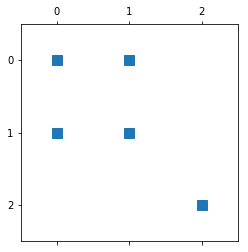

In [287]:
plt.spy(mat_new)

In [279]:
mat_new.setdiag(0)

In [288]:
users_coo = mat_new.tocoo()

In [289]:
users_coo

<3x3 sparse matrix of type '<class 'numpy.int32'>'
	with 5 stored elements in COOrdinate format>

In [290]:
users_coo.data

array([1, 1, 1, 1, 1], dtype=int32)

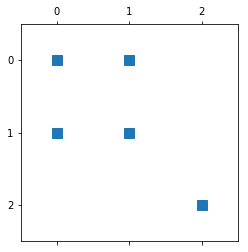

In [292]:
plt.spy(mat_new)

In [293]:
users_coo.row

array([0, 0, 1, 1, 2], dtype=int32)

In [294]:
users_coo.col

array([1, 0, 1, 0, 2], dtype=int32)

In [334]:
users_coo.data

array([1, 1, 1, 1, 1], dtype=int32)

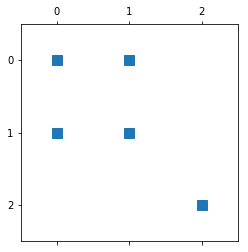

In [296]:
plt.spy(users_coo)

### cooMatrix 연습...

In [338]:
from scipy.sparse import coo_matrix

row  = np.array([0, 3, 1, 0, 0])
col  = np.array([0, 3, 1, 2, 0])
data = np.array([4, 5, 7, 9, 2])
coo_matrix((data, (row, col)), shape=(4, 4)).toarray()

array([[6, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])

# 2-2. Representing network data with pandas
### Advantage
- Human-readable
- Do further analysis with pandas

### Disadvantages
- Repetitive; disk space

### Node list
- Each row is one node
- The columns represent metadata attached to that node

### Edge list
- Each row is one edge
- The columns represent the metadata attached the edge

In [301]:
nodelist_csv = pd.read_csv('american-revolution.csv')

In [307]:
nodelist_df = pd.DataFrame(nodelist_csv)

In [308]:
nodelist_df

,person,party,weight
0,Barrett.Samuel,LondonEnemies,1
1,Barrett.Samuel,StAndrewsLodge,1
2,Marshall.Thomas,LondonEnemies,1
3,Eaton.Joseph,TeaParty,1
4,Bass.Henry,LondonEnemies,1


In [311]:
G2.nodes(data = True)

NodeDataView({'customer1': {'bipartite': 'customers'}, 'customer2': {'bipartite': 'customers'}, 'customer3': {'bipartite': 'customers'}, 'product1': {'bipartite': 'products'}, 'product2': {'bipartite': 'products'}})

In [ ]:
# nodelist = []

# for n, d in G.nodes(data = True):
#     node_data = dict()
#     node_data['node'] = n
#     node_data.update(d)
#     nodelist.append(node_data)

In [299]:
G.nodes(data = True)

NodeDataView({})

# 3. Time series analysis
<img src = './img/Time_series.jpg'>

### How some number changes as a function of time
- Is there an upward or downward trend?

### Rate of change of things over a sliding window of time

### Example)
- Tracking weight over time
- Tracking stock investment portfolio value over time

# 3-1. Evolving graphs

### Graphs that change over time : communication networks

### Assumptions:
- Edge changes over time; assume nodes stay constant
- Both edges and nodes change over time

# 3-2. Graph differences
### Graphs are comprised of:
- A node set
- An edge set

### If a node set doesn't change:
- Changing only the edge set will result in a change in the graph

<img src = './img/Analogy.jpg'>

In [312]:
import networkx as nx
G1 = nx.Graph()
G2 = nx.Graph()

G1.add_nodes_from(['cust1','cust2','cust3'])
G2.add_nodes_from(['cust1','cust2','cust3'])

G1.add_edges_from([['cust1','cust2'],['cust3','cust2']])
G2.add_edges_from([['cust1','cust3'],['cust3','cust2']])

In [313]:
G1.edges()

EdgeView([('cust1', 'cust2'), ('cust2', 'cust3')])

In [314]:
G2.edges()

EdgeView([('cust1', 'cust3'), ('cust2', 'cust3')])

In [317]:
G2minusG1 = nx.difference(G2,G1)

In [318]:
G1minusG2 = nx.difference(G1,G2)

In [320]:
list(G2minusG1)

['cust1', 'cust2', 'cust3']

In [321]:
list(G1minusG2)

['cust1', 'cust2', 'cust3']

In [322]:
months = range(4,11)

# 3-3. Evolving graph statistics

### Graph summary statistics
- Number of nodes
- Number of edges
- Degree distribution
- Centrality distribution

### Evolving graph statistics
- For simple metrics, use edgelist data
- For graph theoretic metrics, use graph object

### Cumulative distribution (누적 분포)
- Compact way of representing the distribution of values
<img src = "./img/Cumulative.jpg">

# 3-4. Zomming in & zooming out: Overall graph summary

## Graph exploration at scales
- Exploration at global and local scales
- Global : Centrality distributions
- Local : Connectivity and structures

## Zooming on nodes
- Isolate a given node or set of nodes
- Plot node statistic over time

## Summarizing evolving node statistics

### Customer-product dataset
- Investigate how purchasing patterns have changed over time

### 'customer1' - node of interest

In [ ]:
# Gs = [...]
# noi = 'customer1'
# degs = []
# for g in Gs:
#     degs.append(len(g.neighbors(noi)))
#     plt.plot(degs)
#     plt.show()

# 3-5. Defalut dictionaries

In [326]:
from collections import defaultdict
d = defaultdict(list)

In [327]:
d

defaultdict(list, {})

In [328]:
d['heathrow'].append(0.31)
d['heathrow'].append(0.84)

In [329]:
d

defaultdict(list, {'heathrow': [0.31, 0.84]})

In [331]:
# d2에는 'heathrow' 라는 키가 없기 때문에 에러
d2 = dict()
d2['heathrow'].append(0.31)

KeyError: 'heathrow'